# This script contains:
1. Import Libraries & Data
2. Create scatterplots of key variables
3. Hypotheses
4. Data prep for regression analysis
5. Regression Analysis of Game Time/Year
6. Summary Statistics of Game Time/Year
7. Compare actual & Predicted values of Game Time
8. Analysis of Game Time/Year
9. Data prep for Game Time and Attendance
10. Regression Analysis of Game Time and Attendance
11. Summary Stats of Game Time and Attendance
12. Actual and Predicted Values of Attendance
13. Analysis of Game Time & Attendance


### Import Libraries and Data

In [12]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Import main MLB dataframe
mlb = pd.read_csv(r"C:\Users\cschw\OneDrive\Desktop\MLB Project\Data Sets\Main Data Set\MLB One Tab 9-23 Update.csv")

In [14]:
mlb.head()

,Year,Team,City,State,W,L,W-L%,R,RA,Rdiff,...,Est. Payroll,Avg Game Time,Avg Game Time Min,League,Division,Region,All Star Rating,All Star Viewers,World Series Rating,World Series Viewers
0,2024,Arizona Diamondbacks,Phoenix,Arizona,77,60,0.562,5.4,4.7,0.7,...,NaN,2:43,163,National,West,West,3.8,6123000.0,NaN,NaN
1,2024,Los Angeles Angels,Anaheim,California,57,80,0.416,3.9,4.8,-0.9,...,NaN,2:37,157,American,West,West,3.8,6123000.0,NaN,NaN
2,2024,Los Angeles Dodgers,Los Angeles,California,82,55,0.599,5.0,4.2,0.8,...,NaN,2:41,161,National,West,West,3.8,6123000.0,NaN,NaN
3,2024,Oakland Athletics,Oakland,California,59,78,0.431,4.1,4.6,-0.5,...,NaN,2:34,154,American,West,West,3.8,6123000.0,NaN,NaN
4,2024,San Diego Padres,San Diego,California,78,61,0.561,4.8,4.3,0.5,...,NaN,2:42,162,National,West,West,3.8,6123000.0,NaN,NaN


In [15]:
# Printing all column names
print(mlb.columns)

Index(['Year', 'Team', 'City', 'State', 'W', 'L', 'W-L%', 'R', 'RA', 'Rdiff',
       'Home Wins', 'Home Losses', 'Road Wins', 'Road Losses', '# of Batters',
       'Avg Bat Age', 'R/G', 'G', 'PA', 'AB', 'TR', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', '#P', 'Avg Pitcher Age', 'RA/G',
       'PW', 'PL', 'PW-L%', 'ERA', 'G.1', 'GS', 'GF', 'CG', 'tSho', 'cSho',
       'SV', 'IP', 'HA', 'TRA', 'ER', 'HRA', 'PBB', 'PIBB', 'PSO', 'PHBP',
       'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9',
       'SO/W', 'OLOB', 'Attendance', 'Attend/G', 'BPF', 'PPF',
       '# of All Stars', 'Cumulative # of All Stars', 'Est. Payroll',
       'Avg Game Time', 'Avg Game Time Min', 'League', 'Division', 'Region',
       'All Star Rating', 'All Star Viewers', 'World Series Rating',
       'World Series Viewers'],
      dtype='object')


In [123]:
# Create subset with pertinent columns
mlb_sub = mlb[['Team', 'Year', 'Home Wins', 'Attendance', 'Attend/G', 'Avg Game Time Min']]

In [125]:
mlb_sub.head()

,Team,Year,Home Wins,Attendance,Attend/G,Avg Game Time Min
0,Arizona Diamondbacks,2024,39,1947852,28230,163
1,Los Angeles Angels,2024,29,2160322,30862,157
2,Los Angeles Dodgers,2024,45,3344745,48475,161
3,Oakland Athletics,2024,33,661763,9732,154
4,San Diego Padres,2024,37,2806563,40675,162


### Create Scatter Plots

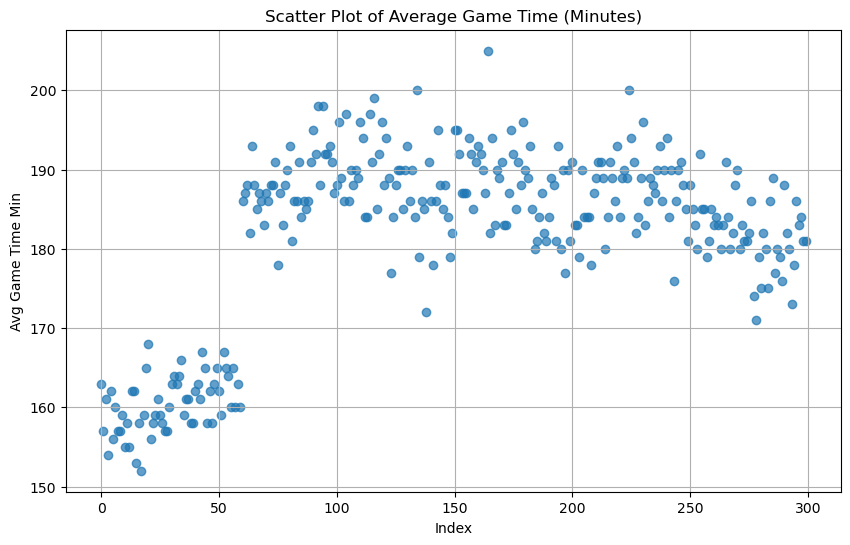

In [128]:
# Create a scatter plot for the 'Avg Game Time Min' column
plt.figure(figsize=(10, 6)) 
plt.scatter(mlb_sub.index, mlb_sub['Avg Game Time Min'], alpha=0.7)
plt.title('Scatter Plot of Average Game Time (Minutes)')
plt.xlabel('Index')
plt.ylabel('Avg Game Time Min')
plt.grid(True)  
plt.show()

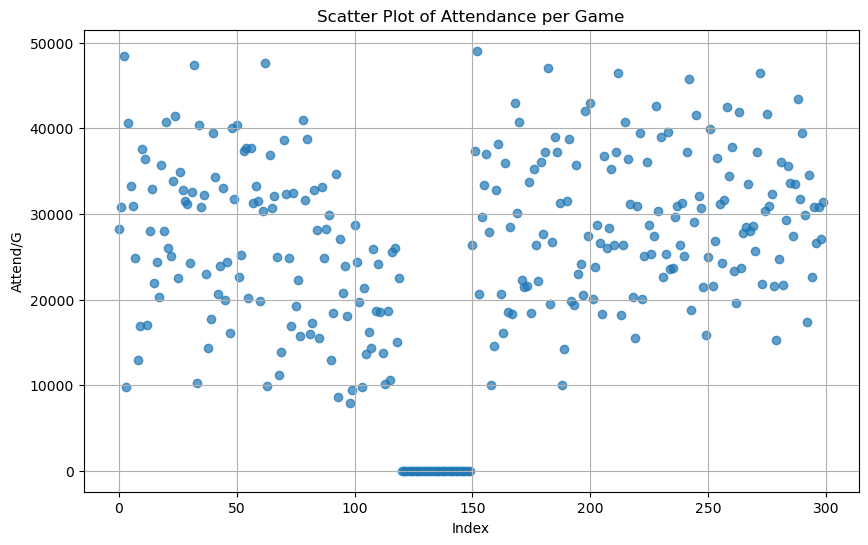

In [130]:
# Create a scatter plot for the 'Avg Game Time Min' column
plt.figure(figsize=(10, 6)) 
plt.scatter(mlb_sub.index, mlb_sub['Attend/G'], alpha=0.7)
plt.title('Scatter Plot of Attendance per Game')
plt.xlabel('Index')
plt.ylabel('Attend/G')
plt.grid(True)  
plt.show()

### Hypotheses:
1. As year increases, the average time of games will decrease
2. As average time of games decreases, attendance will increase
3. As year increases, average attendance will decrease

### Data prep for regression analysis of game time and year

In [134]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = mlb_sub['Year'].values.reshape(-1,1)
y = mlb_sub['Avg Game Time Min'].values.reshape(-1,1)

In [136]:
X

array([[2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2024],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2023],
       [2022],
       [2022],
       [2022],
       [2022],
       [2022],
       [2022],
       [20

In [138]:
y

array([[163],
       [157],
       [161],
       [154],
       [162],
       [156],
       [160],
       [157],
       [157],
       [159],
       [155],
       [158],
       [155],
       [162],
       [162],
       [153],
       [158],
       [152],
       [159],
       [165],
       [168],
       [156],
       [158],
       [159],
       [161],
       [159],
       [158],
       [157],
       [157],
       [160],
       [163],
       [164],
       [163],
       [164],
       [166],
       [159],
       [161],
       [161],
       [158],
       [158],
       [162],
       [163],
       [161],
       [167],
       [165],
       [158],
       [162],
       [158],
       [163],
       [165],
       [162],
       [159],
       [167],
       [165],
       [164],
       [160],
       [165],
       [160],
       [163],
       [160],
       [186],
       [187],
       [188],
       [182],
       [193],
       [188],
       [185],
       [187],
       [186],
       [183],
       [187],
      

In [140]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis of Game Time and Year

In [143]:
# Create a regression object.
regression = LinearRegression()

In [145]:
regression.fit(X_train, y_train)

LinearRegression()

In [147]:
# Predict the values of y using X for training set
y_train_predicted = regression.predict(X_train)

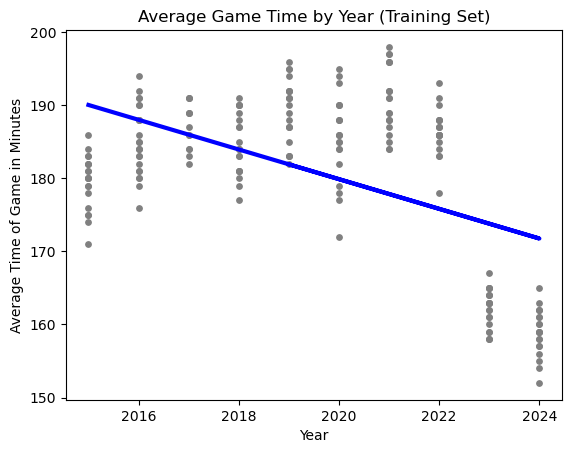

In [149]:
# Create a plot that shows the regression line from the model on the training set.
plot_train = plt
plot_train.scatter(X_train, y_train, color='gray', s=15)
plot_train.plot(X_train, y_train_predicted, color='blue', linewidth=3)
plot_train.title('Average Game Time by Year (Training Set)')
plot_train.xlabel('Year')
plot_train.ylabel('Average Time of Game in Minutes')
plot_train.show()


In [151]:
# Predict the values of y using X for test set
y_test_predicted = regression.predict(X_test)

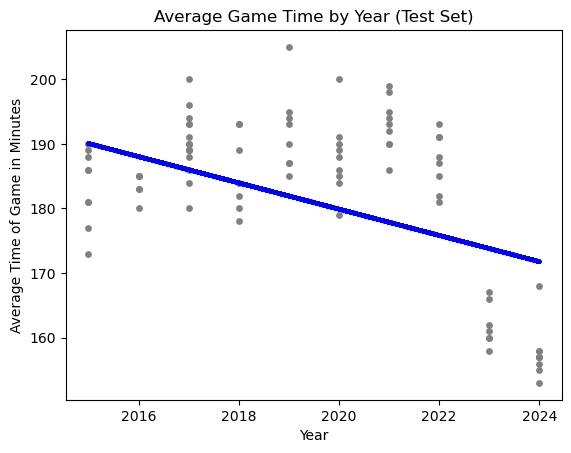

In [153]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_test_predicted, color='blue', linewidth =3)
plot_test.title('Average Game Time by Year (Test Set)')
plot_test.xlabel('Year')
plot_test.ylabel('Average Time of Game in Minutes')
plot_test.show()

In [155]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_test_predicted)
r2 = r2_score(y_test, y_test_predicted)

Analysis: There is a clear decrease in game time in theres 2023 and 2024, however the data is limited. The line doesn't fit that well because there hasn't been a steady decrease over time, but rather a sudden drop in 2023. Game length has clearly decreased, but it was not a steady decline. So, the line reflects the trend in decreasing times, but it doesn't fit the data particularly well. 

### Time/Year Summary Stats

In [159]:
# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.03195771]]
Mean squared error:  110.68015827145453
R2 score:  0.26487673836706604


### Compare actual & predicted y values of time/year

In [162]:
# Ensure y_test and y_test_predicted are 1-dimensional arrays
y_test_reshaped = y_test.ravel()  # Flatten the array if necessary
y_test_predicted_reshaped = y_test_predicted.ravel()

# Create the comparison table
comparison_table = pd.DataFrame({
    'Actual': y_test_reshaped,
    'Predicted': y_test_predicted_reshaped
})

# Display the table
print(comparison_table)


    Actual   Predicted
0      178  183.960047
1      182  183.960047
2      155  171.768301
3      189  185.992005
4      190  185.992005
..     ...         ...
85     187  175.832217
86     191  185.992005
87     194  185.992005
88     185  188.023963
89     193  185.992005

[90 rows x 2 columns]


### Analysis of Game Time/Year:

The model doesn't fit very well and the predicted values are at times far off from the actual values. The data doesn't fit a linear trend - there is a large drop off in game time begininng in 2023 but not a steady declining that would fit well to a line. There clearly has been a large decrease in game time, so it would seem that the MLB rule changes are working, but a linear regression doesn't reflect this very well. 

### Data Prep Analysis of Game Time and Attendance

In [200]:
# Creating new subset that removes that year 2020 to account for zero attendance during pandemic.
mlb_sub2 = mlb_sub[mlb_sub['Year'] != 2020]


In [202]:
# Check head of subset
mlb_sub2.head()

,Team,Year,Home Wins,Attendance,Attend/G,Avg Game Time Min
0,Arizona Diamondbacks,2024,39,1947852,28230,163
1,Los Angeles Angels,2024,29,2160322,30862,157
2,Los Angeles Dodgers,2024,45,3344745,48475,161
3,Oakland Athletics,2024,33,661763,9732,154
4,San Diego Padres,2024,37,2806563,40675,162


In [204]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = mlb_sub2['Avg Game Time Min'].values.reshape(-1,1)
y = mlb_sub2['Attend/G'].values.reshape(-1,1)

In [221]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis of Game Time and Attendance per Game

In [228]:
# Create a regression object.
regression = LinearRegression()

In [230]:
regression.fit(X_train, y_train)

LinearRegression()

In [232]:
# Predict the values of y using X for training set
y_train_predicted = regression.predict(X_train)

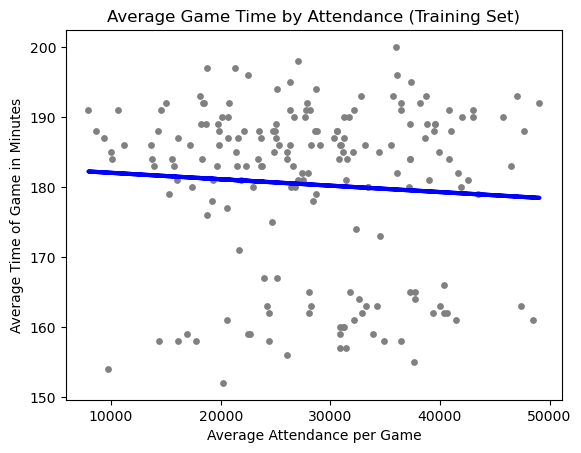

In [242]:
# Create a plot that shows the regression line from the model on the training set.
plot_train = plt
plot_train.scatter(X_train, y_train, color='gray', s=15)
plot_train.plot(X_train, y_train_predicted, color='blue', linewidth=3)
plot_train.title('Average Game Time by Attendance (Training Set)')
plot_train.xlabel('Average Attendance per Game')
plot_train.ylabel('Average Time of Game in Minutes')
plot_train.show()

In [256]:
# Predict the values of y using X for test set
y_test_predicted = regression.predict(X_test)

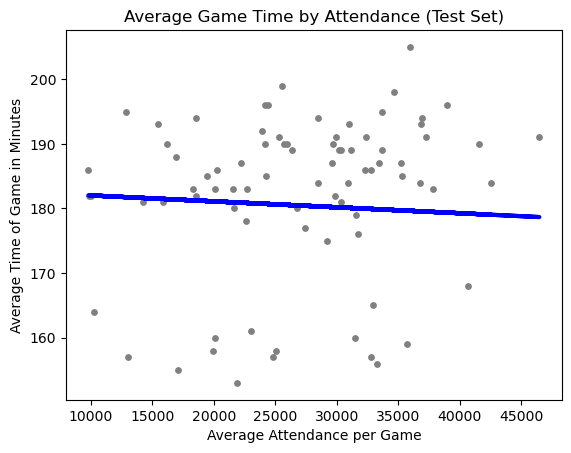

In [254]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_test_predicted, color='blue', linewidth =3)
plot_test.title('Average Game Time by Attendance (Test Set)')
plot_test.xlabel('Average Attendance per Game')
plot_test.ylabel('Average Time of Game in Minutes')
plot_test.show()

### Summary Statistics for Game Time/Attendance

In [258]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_test_predicted)
r2 = r2_score(y_test, y_test_predicted)

In [260]:
# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-9.1652475e-05]]
Mean squared error:  159.36996465812766
R2 score:  -0.04631481326910669


### Compare Actual and Predicted Values of Game Time

In [263]:
# Ensure y_test and y_test_predicted are 1-dimensional arrays
y_test_reshaped = y_test.ravel()  # Flatten the array if necessary
y_test_predicted_reshaped = y_test_predicted.ravel()

# Create the comparison table
comparison_table = pd.DataFrame({
    'Actual': y_test_reshaped,
    'Predicted': y_test_predicted_reshaped
})

# Display the table
print(comparison_table)

    Actual   Predicted
0      193  179.550479
1      182  181.231935
2      185  181.150273
3      193  181.512300
4      175  180.250337
..     ...         ...
76     190  180.551782
77     183  180.954870
78     176  180.023131
79     194  179.543880
80     164  181.988985

[81 rows x 2 columns]


### Analysis of Game Time and Attendance

The regression analysis shows a line that does not fit the data at all. It is almost completely flat. This would suggest that there is not much of a connection between how long a game takes and how many people attend. However, there may be bias in this analysis because attendance has been decreasing for the last 10 years in general anyways. A better analysis would calculate how that rate of change has changed itself over time and if the rate of decrease in attendance has steadied at all. The actual and predicte values do not line up well which shows that this model is a poor fit for the data. 